<a href="https://colab.research.google.com/github/zeynepyilmazz/DataScienceBootcamp/blob/main/04.DataVisualizationwithPython/02.PlottingBasicChartsWithMatplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this assignment, you will continue work with the [Coronavirus Source Data](https://ourworldindata.org/coronavirus-source-data). You will plot different chart types. Don't forget to set titles and axis labels.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

covid = pd.read_csv('owid-covid-data.csv', parse_dates=["date"], low_memory=False)

**(1)** Plot a bar chart for total cases of the 20 countries that havebiggest numbers.

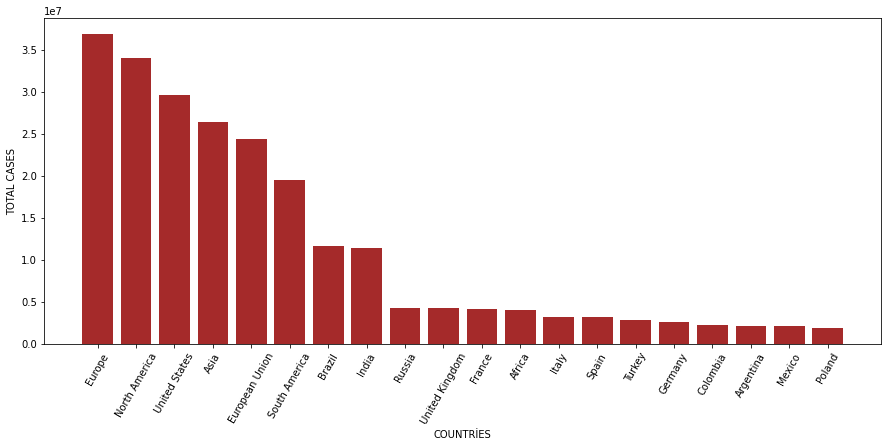

In [2]:
plt.figure(figsize = (15,6))
plt.bar(covid.groupby(by='location')['total_cases'].max().sort_values(ascending = False)[1:21].index ,
        covid.groupby(by='location')['total_cases'].max().sort_values(ascending = False)[1:21],
        color = 'brown')
plt.xlabel('COUNTRİES')
plt.ylabel('TOTAL CASES')
plt.xticks(rotation = 60)
plt.show()

**(2)** Plot a histogram for daily deaths for any country you choose. Make three subplots for different bins.

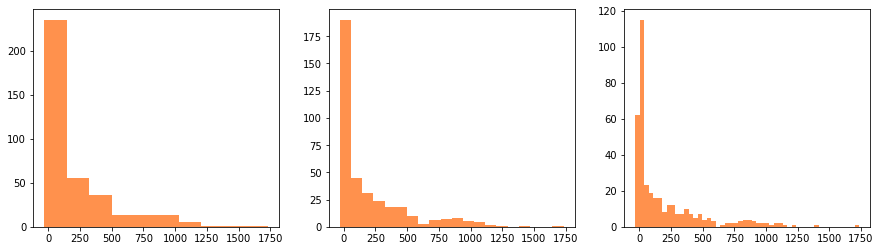

In [3]:
plt.figure(figsize = (15,4))
plt.subplot(1,3,1)
plt.hist(covid[covid['location'] == 'Germany']['new_deaths'] , color = "#FF914D")
plt.subplot(1,3,2)
plt.hist(covid[covid['location'] == 'Germany']['new_deaths'] , bins = 20 , color = "#FF914D")
plt.subplot(1,3,3)
plt.hist(covid[covid['location'] == 'Germany']['new_deaths'] , bins = 50 , color = "#FF914D")
plt.show()

**(3)** Plot a scatter plot of new cases and new death for Germany and France.

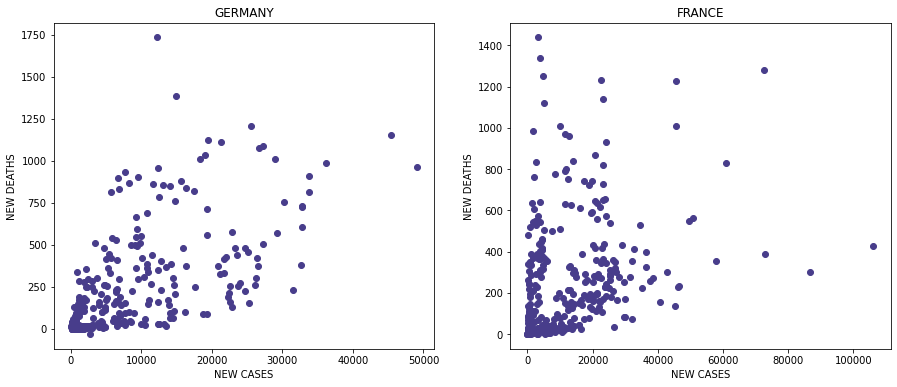

In [4]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('GERMANY')
plt.scatter(covid[covid['location'] == 'Germany']['new_cases'] , covid[covid['location'] == 'Germany']['new_deaths'] ,
            c = '#483D8B')
plt.xlabel('NEW CASES')
plt.ylabel('NEW DEATHS')
plt.subplot(1,2,2)
plt.title('FRANCE')
plt.scatter(covid[(covid['location'] == 'France') & (covid['new_cases'] > 0) & (covid['new_deaths'] > 0)]['new_cases'] , 
            covid[(covid['location'] == 'France') & (covid['new_deaths'] > 0) & (covid['new_cases'] > 0)]['new_deaths'] ,
            color = '#483D8B')
plt.xlabel('NEW CASES')
plt.ylabel('NEW DEATHS')
plt.show()

**(4)** Plot a boxplot for daily deaths for any country you choose.

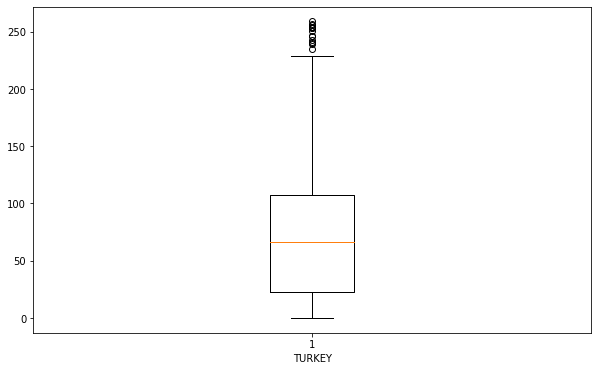

In [5]:
plt.figure(figsize = (10,6))
plt.boxplot(covid[covid['location'] == 'Turkey']['new_deaths'].dropna())
plt.xlabel('TURKEY')
plt.show()

**(5)** Calculate the total case for each continent and plot a pie chart 

In [6]:
continent = []
total_case = []
for group_name , group in covid.groupby(by='continent'):
  continent.append(group_name)
  total_case.append(group.groupby(by = 'location')['total_cases'].max().dropna().values.sum())
print(continent)
print(total_case)

['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']
[4064224.0, 26494349.0, 36946053.0, 34097469.0, 34046.0, 19560848.0]


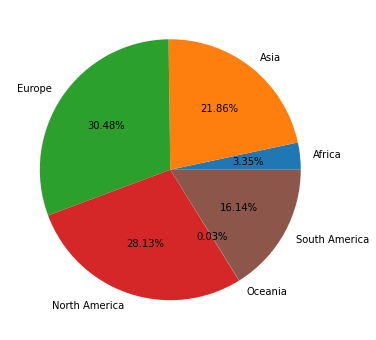

In [7]:
plt.figure(figsize=(16,6))
plt.pie(total_case , labels = continent , autopct='%1.2f%%' )
plt.show()